## 3. MODIFY

In [1]:
import pandas as pd

# Load data and drop unnecessary columns
# data = pd.read_csv('/content/drive/MyDrive/DMW/sampled_data.csv') #random sample
data = pd.read_csv('stratified_sample.csv') #stratisfied data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10086 non-null  int64  
 1   title                 10085 non-null  object 
 2   vote_average          10086 non-null  float64
 3   vote_count            10086 non-null  int64  
 4   status                10086 non-null  object 
 5   release_date          9668 non-null   object 
 6   revenue               10086 non-null  int64  
 7   runtime               10086 non-null  int64  
 8   adult                 10086 non-null  bool   
 9   backdrop_path         2867 non-null   object 
 10  budget                10086 non-null  int64  
 11  homepage              1444 non-null   object 
 12  imdb_id               5557 non-null   object 
 13  original_language     10086 non-null  object 
 14  original_title        10085 non-null  object 
 15  overview           

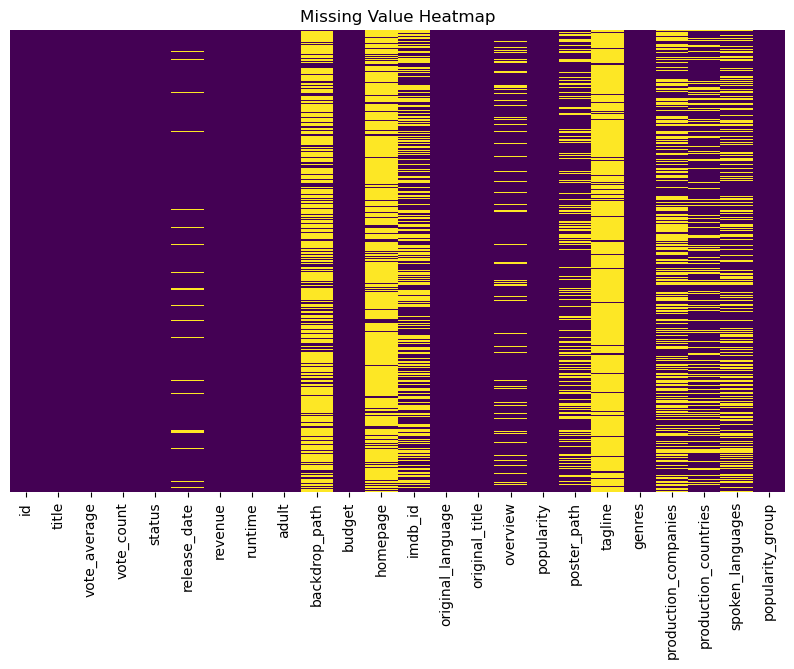

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()


### Data cleaning

In [3]:
total_missing_values = data.isnull().sum().sum()
total_cells = data.size
percentage_total_missing = (total_missing_values / total_cells) * 100

# Print the result
print(f"Percentage of total missing values: {percentage_total_missing:.2f}%")

Percentage of total missing values: 18.48%


In [5]:
# remove unwanted column
data = pd.read_csv('stratified_sample.csv') #stratisfied data
data = data[(data['status'] == 'Released') & (data['runtime'] != 0)]
data = data.drop(['id', 'backdrop_path', 'homepage', 'imdb_id', 'poster_path',
                  'original_title', 'tagline', 'overview', 'status', 'popularity_group'], axis=1)


In [6]:
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_year'] = pd.DatetimeIndex(data['release_date']).year
data['release_month'] = pd.DatetimeIndex(data['release_date']).month
data['release_day_of_week'] = pd.DatetimeIndex(data['release_date']).dayofweek
data['release_day_of_year'] = pd.DatetimeIndex(data['release_date']).dayofyear

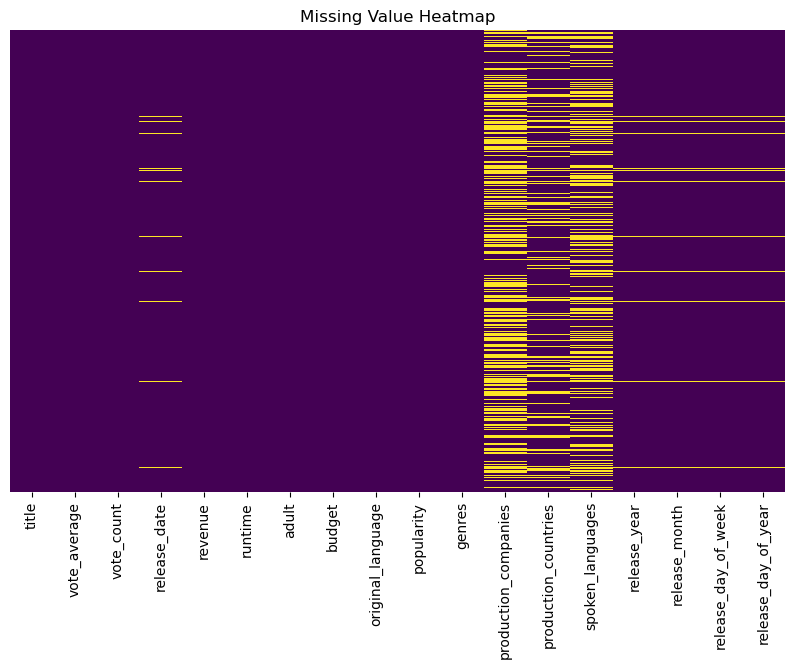

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [8]:
# Group by 'original_language' and get the most frequent 'spoken_languages'
# Define a method to get the most frequent spoken language
def get_most_frequent_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else ""

# Use the method in the groupby aggregation
most_frequent_spoken_languages = (
    data.groupby('original_language')['spoken_languages']
    .agg(get_most_frequent_mode)
    .to_dict()
)

most_frequent_spoken_languages

{'ar': 'Arabic',
 'az': 'Azerbaijani',
 'be': '',
 'bg': 'No Language',
 'bn': 'Bengali',
 'bs': 'No Language',
 'ca': 'Catalan',
 'ch': '',
 'cn': 'Cantonese',
 'cs': 'No Language',
 'cy': '',
 'da': 'Danish',
 'de': 'German',
 'dz': '',
 'el': 'Greek',
 'en': 'English',
 'es': 'Spanish',
 'et': 'Estonian',
 'eu': 'Basque',
 'fa': 'Persian',
 'fi': 'Finnish',
 'fr': 'French',
 'ga': 'Irish',
 'gl': 'No Language',
 'he': 'Hebrew',
 'hi': 'Hindi',
 'hr': 'No Language',
 'ht': '',
 'hu': 'Hungarian',
 'hy': 'No Language',
 'id': 'Indonesian',
 'is': 'Icelandic',
 'it': 'Italian',
 'iu': '',
 'ja': 'Japanese',
 'ka': 'Georgian',
 'ko': 'Korean',
 'ku': 'Arabic, Kurdish',
 'la': 'English',
 'lt': 'Lithuanian',
 'lv': 'Latvian',
 'mi': 'Maori',
 'mk': 'Macedonian',
 'mo': 'No Language',
 'ms': 'Malay',
 'nb': 'Norwegian',
 'nl': 'Dutch',
 'no': 'Norwegian',
 'os': 'English, Ossetian; Ossetic',
 'pa': 'Punjabi',
 'pl': 'No Language',
 'pt': 'Portuguese',
 'qu': 'Spanish, Quechua',
 'ro': 'Ro

In [9]:
def fill_spoken_languages(row, most_frequent):
    if pd.isnull(row['spoken_languages']):
        return most_frequent.get(row['original_language'], "")
    return row['spoken_languages']

# Apply the function to the DataFrame
data['spoken_languages'] = data.apply(
    lambda row: fill_spoken_languages(row, most_frequent_spoken_languages), axis=1
)

In [10]:
# prompt: fill na of production companies with "unspecified"

# Fill NaN values in 'production_companies' with "unspecified"
data['production_companies'] = data['production_companies'].fillna('unspecified')

In [11]:
# Fill production countries with 'unspecified' where production companies are 'unspecified'
data.loc[data['production_companies'] == 'unspecified', 'production_countries'] = 'unspecified'

In [12]:
total_missing_values = data.isnull().sum().sum()
total_cells = data.size
percentage_total_missing = (total_missing_values / total_cells) * 100

# Print the result
print(f"Percentage of total missing values: {percentage_total_missing:.2f}%")

Percentage of total missing values: 0.74%


In [13]:
# Drop rows with any remaining null values
data = data.dropna()

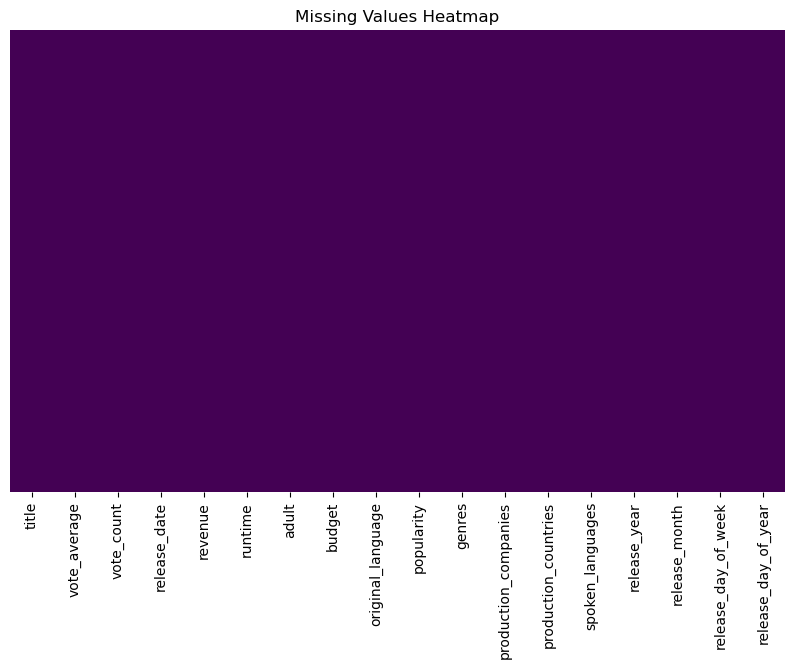

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 10085
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 8248 non-null   object        
 1   vote_average          8248 non-null   float64       
 2   vote_count            8248 non-null   int64         
 3   release_date          8248 non-null   datetime64[ns]
 4   revenue               8248 non-null   int64         
 5   runtime               8248 non-null   int64         
 6   adult                 8248 non-null   bool          
 7   budget                8248 non-null   int64         
 8   original_language     8248 non-null   object        
 9   popularity            8248 non-null   float64       
 10  genres                8248 non-null   object        
 11  production_companies  8248 non-null   object        
 12  production_countries  8248 non-null   object        
 13  spoken_languages      

### Feture engineering

In [16]:
# method for calculate feature corralation and join plot
import seaborn as sns
import matplotlib.pyplot as plt

def corralation(f1, f2):
  print(data[[f1, f2]].corr())
  print()
  # sns.jointplot(data=data, x=f1, y=f2, kind='reg')
  # plt.show()

#### Title Length

In [17]:
# get title length
data['title_length'] = data['title'].apply(lambda x: len(x))
data = data.drop('title', axis=1)

# correlation and relationship
corralation('title_length', 'popularity')
# corralation('title_length', 'popularity_normalized')


              title_length  popularity
title_length      1.000000    0.200658
popularity        0.200658    1.000000



#### Profit

In [18]:
# create profit
data['profit'] = data['revenue'] - data['budget']

# calculate correlation
corralation('profit', 'popularity')
corralation('revenue', 'popularity')
corralation('budget', 'popularity')

              profit  popularity
profit      1.000000   -0.011073
popularity -0.011073    1.000000

             revenue  popularity
revenue     1.000000    0.124728
popularity  0.124728    1.000000

              budget  popularity
budget      1.000000    0.174516
popularity  0.174516    1.000000



#### Total Vote

In [19]:
# feature vote total
data['vote_total'] = data['vote_average'] * data['vote_count']

# calculate correlation
corralation('vote_total', 'popularity')
corralation('vote_average', 'popularity')
corralation('vote_count', 'popularity')

# corralation('vote_total', 'popularity_normalized')

            vote_total  popularity
vote_total    1.000000    0.521761
popularity    0.521761    1.000000

              vote_average  popularity
vote_average      1.000000    0.367697
popularity        0.367697    1.000000

            vote_count  popularity
vote_count    1.000000    0.559222
popularity    0.559222    1.000000



#### Date

In [20]:
# feature engineering
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_year'] = pd.DatetimeIndex(data['release_date']).year
data['release_month'] = pd.DatetimeIndex(data['release_date']).month
data['release_day_of_week'] = pd.DatetimeIndex(data['release_date']).dayofweek
data['release_day_of_year'] = pd.DatetimeIndex(data['release_date']).dayofyear

# corralation
corralation('release_date', 'popularity')
corralation('release_year', 'popularity')
corralation('release_month', 'popularity')
# corralation('release_month', 'popularity_normalized')


              release_date  popularity
release_date      1.000000    0.001363
popularity        0.001363    1.000000

              release_year  popularity
release_year      1.000000    0.000146
popularity        0.000146    1.000000

               release_month  popularity
release_month       1.000000    0.102211
popularity          0.102211    1.000000



#### Genre

In [21]:
# calculate popularity average of each genre and assign a score
data_expanded = data.assign(genres_list=data['genres'].str.split(',').apply(lambda x: [i.strip() for i in x])).explode('genres_list')
genre_popularity = data_expanded.groupby('genres_list')['popularity'].mean().reset_index()
genre_popularity.columns = ['Genre', 'Average Popularity']
genre_popularity.sort_values(by='Average Popularity', ascending=False, inplace=True)
genre_popularity['genre_score'] = range(len(genre_popularity), 0, -1)

print(genre_popularity)
print()
genre_score_map = dict(zip(genre_popularity['Genre'], genre_popularity['genre_score']))


def total_genre_score(genres):
    if not isinstance(genres, str):
        return 0

    genre_list = [g.strip() for g in genres.split(',')]
    return sum(genre_score_map.get(genre, 0) for genre in genre_list)

data['genre_combo_score'] = data['genres'].apply(total_genre_score)
print(data[['genres', 'genre_combo_score']].head())
print()

# correlation
# corralation('genre_combo_score', 'popularity_normalized')
corralation('genre_combo_score', 'popularity')


              Genre  Average Popularity  genre_score
15         TV Movie            2.649927           19
4             Crime            2.563378           18
1         Adventure            2.427137           17
0            Action            2.421926           16
7            Family            2.030505           15
8           Fantasy            2.020448           14
13          Romance            1.968058           13
12          Mystery            1.935951           12
14  Science Fiction            1.921498           11
16         Thriller            1.765447           10
3            Comedy            1.732419            9
17              War            1.649222            8
9           History            1.624519            7
6             Drama            1.587087            6
11            Music            1.393725            5
10           Horror            1.211683            4
2         Animation            1.093852            3
18          Western            0.955520       

#### production companies

In [22]:
# calculate popularity average of each company
data_expanded = data.assign(company=data['production_companies'].str.split(',')).explode('company')
company_popularity = data_expanded.groupby('company')['popularity'].mean().reset_index()
company_popularity.columns = ['Company', 'Average Popularity']
company_popularity.sort_values(by='Average Popularity', ascending=False, inplace=True)

# company_popularity['prod_company_score'] = range(len(company_popularity), 0, -1)
company_popularity['prod_company_score'] = company_popularity['Average Popularity'].apply(int)
company_score_map = dict(zip(company_popularity['Company'], company_popularity['prod_company_score']))
company_popularity

print('Company score')
print(company_popularity)

Company score
                               Company  Average Popularity  prod_company_score
922                       STUDIO PONOC              10.987                  10
935             Samuel Goldwyn Company              10.966                  10
1480           Bagdasarian Productions              10.966                  10
967                  Shin-Ei Animation              10.916                  10
2288     Mattel Playground Productions              10.905                  10
...                                ...                 ...                 ...
1377                         Amor Film               0.000                   0
3117  don't walk home alone after dark               0.000                   0
714                            Mosfilm               0.000                   0
2330              Momiqimio Production               0.000                   0
2727                Steel Wool Studios               0.000                   0

[3155 rows x 3 columns]


In [23]:
def total_company_score(companies):
    if not isinstance(companies, str):
        return 0

    company_list = [c.strip() for c in companies.split(',')]
    return sum(company_score_map.get(company, 0) for company in company_list)

data['company_combo_score'] = data['production_companies'].apply(total_company_score)
print(data[['production_companies', 'company_combo_score']].sort_values(by=['company_combo_score'], ascending=False).head())
print()

# correlation
corralation('company_combo_score', 'popularity')

                                   production_companies  company_combo_score
1512  Ultra Super Pictures, Avex Entertainment, avex...                   20
3837  WIT STUDIO, BLADE, Shochiku, Production I.G, K...                   18
8200  Yomiuri Shimbun Company, Shochiku, Nippon Tele...                   17
4860  Warner Premiere Digital, DC Comics, LEGO, TT A...                   17
1876  Bill Melendez Productions, United Feature Synd...                   16

                     company_combo_score  popularity
company_combo_score             1.000000    0.673158
popularity                      0.673158    1.000000



In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8248 entries, 0 to 10085
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   vote_average          8248 non-null   float64       
 1   vote_count            8248 non-null   int64         
 2   release_date          8248 non-null   datetime64[ns]
 3   revenue               8248 non-null   int64         
 4   runtime               8248 non-null   int64         
 5   adult                 8248 non-null   bool          
 6   budget                8248 non-null   int64         
 7   original_language     8248 non-null   object        
 8   popularity            8248 non-null   float64       
 9   genres                8248 non-null   object        
 10  production_companies  8248 non-null   object        
 11  production_countries  8248 non-null   object        
 12  spoken_languages      8248 non-null   object        
 13  release_year          

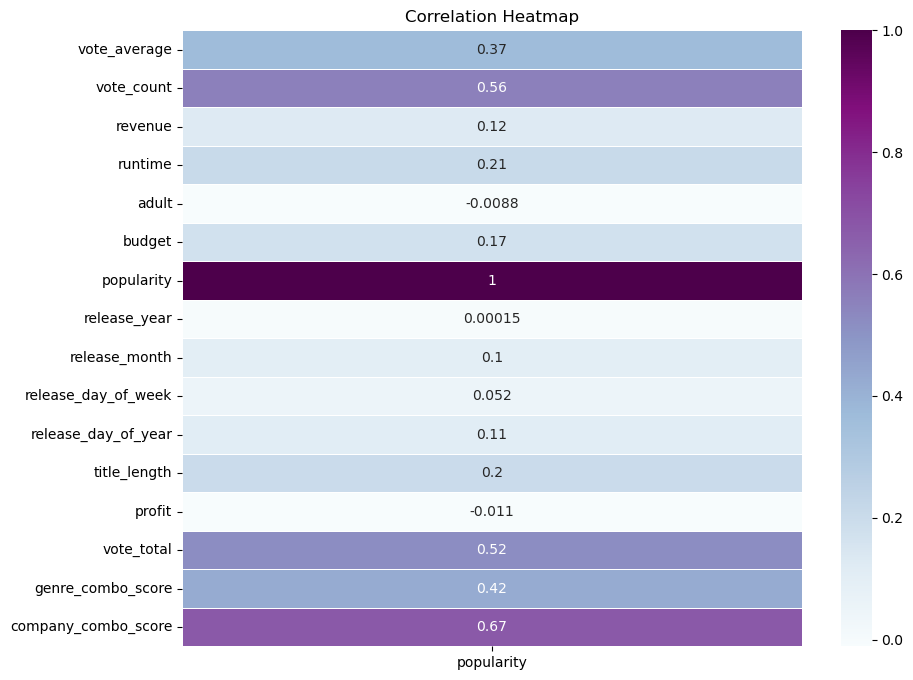

In [25]:
# select columns where type is not object
selected_columns = data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns


# correlation heatplot
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data[selected_columns].corr()
# Select the 'popularity' column and convert to DataFrame to make it 2D
corr_matrix = corr_matrix[['popularity']]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
selected_columns

Index(['vote_average', 'vote_count', 'revenue', 'runtime', 'adult', 'budget',
       'popularity', 'release_year', 'release_month', 'release_day_of_week',
       'release_day_of_year', 'title_length', 'profit', 'vote_total',
       'genre_combo_score', 'company_combo_score'],
      dtype='object')

In [32]:
from autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

X = data[selected_columns.drop('popularity')]
y = data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
af_reg = AutoFeatRegressor(verbose=1)
X_train_transformed = af_reg.fit_transform(X_train, y_train)

# Transform the entire sample
data_transformed_array = af_reg.transform(data[selected_columns.drop('popularity')])

2025-01-17 15:56:27,235 INFO: [AutoFeat] The 2 step feature engineering process could generate up to 5565 features.
2025-01-17 15:56:27,236 INFO: [AutoFeat] With 6598 data points this new feature matrix would use about 0.15 gb of space.
2025-01-17 15:56:27,244 INFO: [feateng] Step 1: transformation of original features


2025-01-17 15:56:32,019 INFO: [feateng] Generated 48 transformed features from 15 original features - done.
2025-01-17 15:56:32,027 INFO: [feateng] Step 2: first combination of features


c:\Users\Aqilah\miniconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


c:\Users\Aqilah\miniconda3\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


2025-01-17 15:56:34,831 INFO: [feateng] Generated 1921 feature combinations from 1953 original feature tuples - done.


2025-01-17 15:56:34,986 INFO: [feateng] Generated altogether 1984 new features in 2 steps
2025-01-17 15:56:34,989 INFO: [feateng] Removing correlated features, as well as additions at the highest level
2025-01-17 15:56:35,315 INFO: [feateng] Generated a total of 1167 additional features
2025-01-17 15:56:35,412 INFO: [featsel] Feature selection run 1/5


[featsel] Scaling data...done.


2025-01-17 15:56:42,944 INFO: [featsel] Feature selection run 2/5
2025-01-17 15:56:49,401 INFO: [featsel] Feature selection run 3/5
2025-01-17 15:56:58,875 INFO: [featsel] Feature selection run 4/5
2025-01-17 15:57:08,762 INFO: [featsel] Feature selection run 5/5
2025-01-17 15:57:16,257 INFO: [featsel] 89 features after 5 feature selection runs
c:\Users\Aqilah\miniconda3\Lib\site-packages\autofeat\featsel.py:270: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  if np.max(np.abs(correlations[c].ravel()[:i])) < 0.9:
2025-01-17 15:57:16,612 INFO: [featsel] 69 features after correlation filtering
2025-01-17 15:57:17,109 INFO: [featsel] 29 features after noise filtering
2025-01-17 15:57:17,127 INFO: [AutoFeat] Computing 28 new features.


2025-01-17 15:57:22,689 INFO: [AutoFeat]    28/   28 new features ...done.
2025-01-17 15:57:22,697 INFO: [AutoFeat] Final dataframe with 43 feature columns (28 new).
2025-01-17 15:57:22,697 INFO: [AutoFeat] Training final regression model.


2025-01-17 15:57:22,808 INFO: [AutoFeat] Trained model: largest coefficients:
2025-01-17 15:57:22,808 INFO: -2.498228910007401
2025-01-17 15:57:22,810 INFO: 0.112136 * sqrt(company_combo_score)*sqrt(vote_count)
2025-01-17 15:57:22,811 INFO: -0.046894 * sqrt(release_day_of_week)*sqrt(vote_average)
2025-01-17 15:57:22,812 INFO: 0.042822 * sqrt(company_combo_score)*sqrt(runtime)
2025-01-17 15:57:22,813 INFO: 0.039606 * sqrt(vote_count)*log(genre_combo_score)
2025-01-17 15:57:22,813 INFO: 0.022576 * vote_count/genre_combo_score
2025-01-17 15:57:22,814 INFO: 0.020193 * sqrt(runtime)*sqrt(vote_count)
2025-01-17 15:57:22,815 INFO: -0.016708 * sqrt(release_month)*sqrt(vote_average)
2025-01-17 15:57:22,815 INFO: 0.005942 * release_day_of_week*sqrt(vote_total)
2025-01-17 15:57:22,816 INFO: 0.005873 * vote_count/runtime
2025-01-17 15:57:22,817 INFO: 0.003002 * title_length*sqrt(vote_count)
2025-01-17 15:57:22,818 INFO: 0.001557 * release_year
2025-01-17 15:57:22,819 INFO: -0.000828 * sqrt(revenue

In [33]:
data_transformed = pd.DataFrame(data_transformed_array)
data_transformed['popularity'] = data['popularity'].reset_index(drop=True)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 44 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   vote_average                                   8248 non-null   float64
 1   vote_count                                     8248 non-null   float64
 2   revenue                                        8248 non-null   float64
 3   runtime                                        8248 non-null   float64
 4   adult                                          8248 non-null   float64
 5   budget                                         8248 non-null   float64
 6   release_year                                   8248 non-null   float64
 7   release_month                                  8248 non-null   float64
 8   release_day_of_week                            8248 non-null   float64
 9   release_day_of_year                            8248 

In [35]:
data_transformed.to_csv('modified_ver4.csv', index=False)

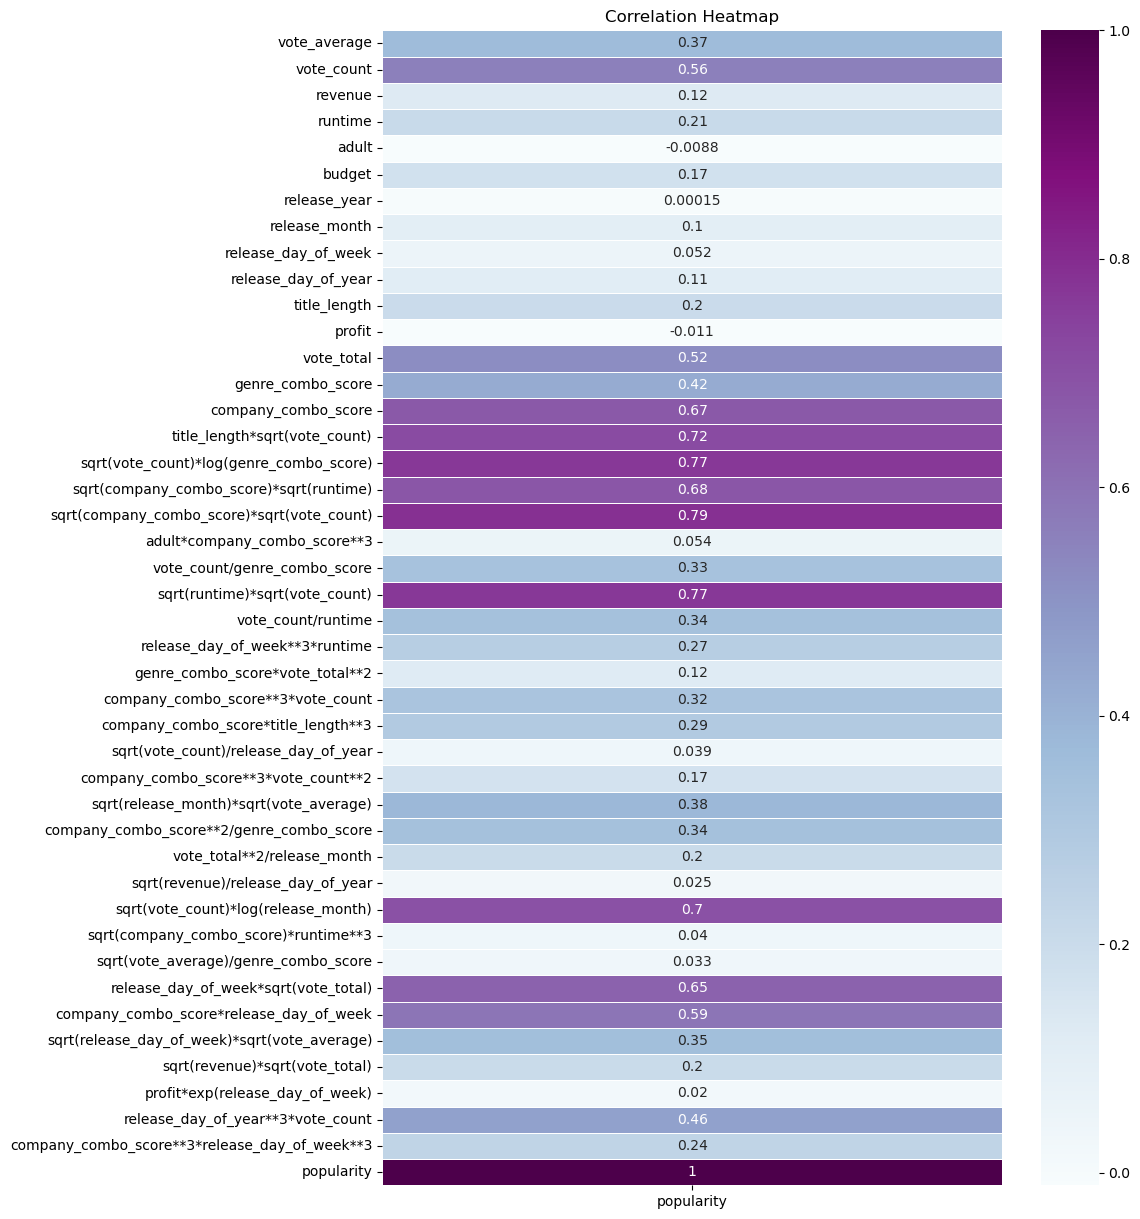

In [42]:
data_transformed = pd.read_csv('modified_ver4.csv')
correlatuion_matrix = data_transformed.corr()
correlatuion_matrix = correlatuion_matrix[['popularity']]

plt.figure(figsize=(10, 15))
sns.heatmap(correlatuion_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()